# Time Curves

# PT3S Release

In [1]:
#pip install PT3S -U --no-deps

# Imports

In [2]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess
import re

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm
    
try:
    from PT3S import Mx
except:
    import Mx

In [3]:
import importlib

In [4]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [5]:
logger = logging.getLogger()  

logFileName= r"Example2.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [6]:
dbFilename="Example2"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [7]:
#NBVAL_IGNORE_OUTPUT
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
)

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example2.db3 exists readable ...
INFO    ; Dx.__init__:  SYSTEMKONFIG ID 3 not defined. Value(ID=3) is supposed to define the Model which is used in QGIS. Now QGISmodelXk is undefined ...
INFO    ; dxAndMxHelperFcts.readDxAndMx:  QGISmodelXk not defined. Now the MX of 1st Model in VIEW_MODELLE is used ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\SIR 3S\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample2\B1\V0\BZ1\M-1-0-1.5.MXS reading ...
INFO    ; dxWithMx.__init__: Example2: processing dx and mx ...
ERROR   ; dxWithMx._V3_AGSNVEC: Exception: Line: 1265: <class 'KeyError'>: 'QM'


# Example for reading only Results

In [8]:
mx=dxAndMxHelperFcts.readMx(wDirMx=m.wDirMx)

INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample2\B1\V0\BZ1\M-1-0-1.5.MXS reading ...


In [9]:
df=mx.df #(=m.mx.df)

# Simpler column names

In [10]:
df.rename(columns={col:col.replace(Mx.reSir3sIDSep+mo.group('OBJTYPE_PK'),'') for col,mo in [(col,re.search(Mx.reSir3sIDcompiled,col)) for col in df.columns.to_list()]},inplace=True)

# Plot

## Define Axes

In [11]:
def fyP(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('Druck in bar')
    ax.set_ylim(0,12)
    ax.set_yticks(sorted(np.append(np.linspace(0,12,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyQ(ax,offset=60):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('Volumenstrom in m3/h')
    ax.set_ylim(0,48)
    ax.set_yticks(sorted(np.append(np.linspace(0,48,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyRSK(ax,offset=120):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('RSK-Stellung in %')
    ax.set_ylim(0,60)
    ax.set_yticks(sorted(np.append(np.linspace(0,60,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

## Non-interactive Plots with Matplotlib

In [12]:
def plot():
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #Druck
    ax1 = ax0.twinx()     
    fyP(ax1) 
    ax1.plot(df.index, df['KNOT~K0011~~PH'], color='red', label='PH K0011')
    ax1.plot(df.index, df['KNOT~5143521_i~~PH'], color='darkgreen', label='PH 5143521_i')
    ax1.plot(df.index, df['KNOT~791393_3_k~~PH'], color='blue', label='PH 791393_3_k')
    ax1.plot(df.index, df['KNOT~1629686_0_i~~PH'], color='yellow', label='PH 1629686_0_i')
    ax1.legend(loc='upper right')
    
    # Volumenstrom
    ax2 = ax0.twinx()     
    fyQ(ax2)
    ax2.plot(df.index, df['VENT~K0006~K0004~QM'], color='orange', label='QM K0006~K0004')
    ax2.plot(df.index, df['VENT~K0011~PST_out~QM'], color='lightgreen', label='QM K0011~PST_out')
    ax2.legend(loc='upper left')
    
    # RSK-Stellung
    ax3 = ax0.twinx() 
    fyRSK(ax3)
    ax3.plot(df.index, df['KLAP~K0013~K0014~PHI'], color='pink', label='PHI K0013~K0014')
    ax3.legend(loc='lower right')
     
    # Set the x-axis limits
    Startzeit=datetime.datetime(2020, 1, 28, 14, 45)
    Endzeit=datetime.datetime(2020, 1, 28, 14, 46)

    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=list(range(0, 61, 2)), yPos=0)

    ax0.set_title('Time Curves for '+dbFilename+' from '+Startzeit.strftime('%Y-%m-%d %H:%M:%S')+" to "+Endzeit.strftime('%Y-%m-%d %H:%M:%S'))

    #Create printable Output
    plt.savefig('Example2_Output.pdf', format='pdf', dpi=300)
    plt.savefig('Example2_Output.png', format='png', dpi=300)
    
    plt.show()

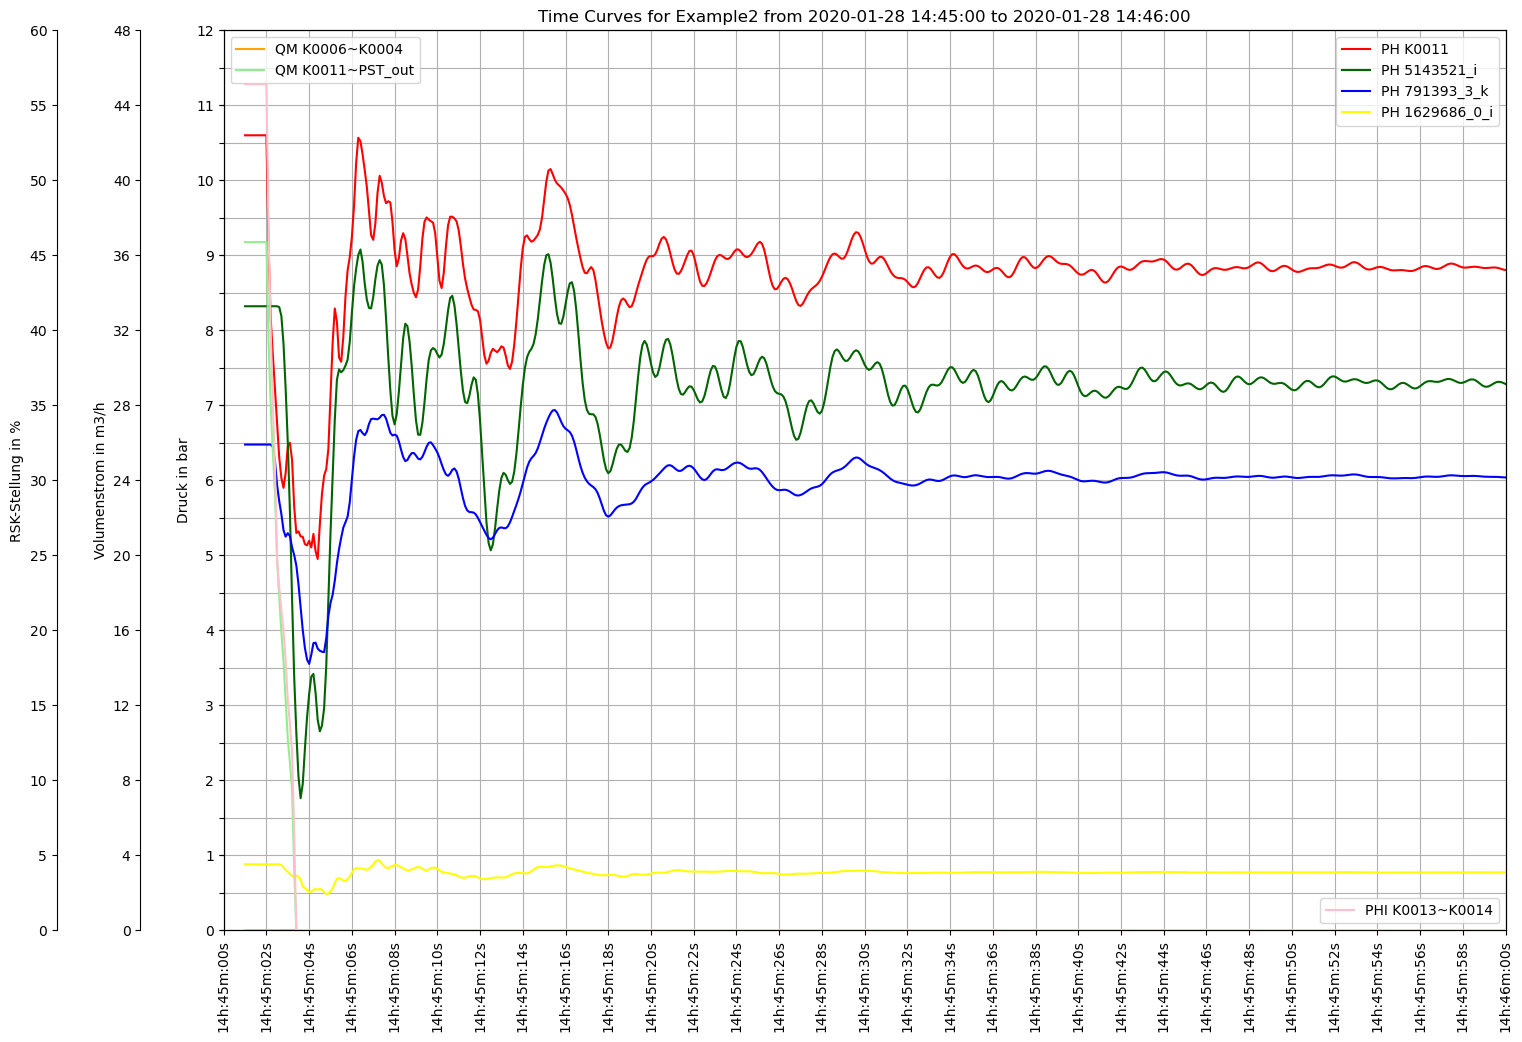

In [13]:
plot()

## Interactive Plots

### Using Widgets

In [14]:
Startzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 45),
    description='Startzeit:'
)

Endzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 46),
    description='Endzeit:'
)

Druck = widgets.Checkbox(value=1,description='Druck')
Volumenstrom = widgets.Checkbox(value=1,description='Volumenstrom')
RSK_Stellung = widgets.Checkbox(value=1,description='RSK-Stellung')
Save = widgets.Checkbox(description='Save as PDF')

In [15]:
def interactive_plot(Startzeit, Endzeit, Druck, Volumenstrom, RSK_Stellung, save):
                       
    fig, ax0 = plt.subplots(figsize=(11.7, 8.3))  # A3 size in inches
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    i = 0
    
    if Druck:
        i += 1
        ax1 = ax0.twinx()     
        fyP(ax1, (i-1)*60)
                
        ax1.plot(df.index, df['KNOT~K0011~~PH'], color='red', label='PH K0011')
        ax1.plot(df.index, df['KNOT~5143521_i~~PH'], color='darkgreen', label='PH 5143521_i')
        ax1.plot(df.index, df['KNOT~791393_3_k~~PH'], color='blue', label='PH 791393_3_k')
        ax1.plot(df.index, df['KNOT~1629686_0_i~~PH'], color='yellow', label='PH 1629686_0_i')
        ax1.legend(loc='upper right')
            
    if Volumenstrom:
        i += 1
        ax2 = ax0.twinx()     
        fyQ(ax2, (i-1)*60)
        ax2.plot(df.index, df['VENT~K0006~K0004~QM'], color='orange', label='QM K0006~K0004')
        ax2.plot(df.index, df['VENT~K0011~PST_out~QM'], color='lightgreen', label='QM K0011~PST_out')
        ax2.legend(loc='upper left')
        
    if RSK_Stellung:
        i += 1
        ax3 = ax0.twinx()     
        fyRSK(ax3, (i-1)*60)
        ax3.plot(df.index, df['KLAP~K0013~K0014~PHI'], color='pink', label='PHI K0013~K0014')
        ax3.legend(loc='lower right')
        
    # Set the x-axis limits
    Startzeit = datetime.datetime.combine(datetime.date(2020, 1, 28), Startzeit)
    Endzeit = datetime.datetime.combine(datetime.date(2020, 1, 28), Endzeit)

    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=list(range(0, 61, 2)), yPos=0)

    ax0.set_title('Time Curves for '+dbFilename+' from '+Startzeit.strftime('%Y-%m-%d %H:%M:%S')+" to "+Endzeit.strftime('%Y-%m-%d %H:%M:%S'))
    
    plt.show()
    
    if save:
        fig.savefig('Example2_Output_2.pdf')
        print("Plot saved as Example2_Output_2.pdf")

In [16]:
widgets_interact = widgets.interactive(interactive_plot,
                                       Startzeit=Startzeit_widget, 
                                       Endzeit=Endzeit_widget,
                                       Druck=Druck,
                                       Volumenstrom=Volumenstrom,
                                       RSK_Stellung=RSK_Stellung,
                                       save=Save)

In [17]:
# Function to update the plot
def update_plot(change):
    plt.clf()
    interactive_plot(Druck=Druck.value, Volumenstrom=Volumenstrom.value, RSK_Stellung=RSK_Stellung.value,
                     Startzeit=Startzeit_widget.value, Endzeit=Endzeit_widget.value, save=Save.value)

# Observe changes in widgets
Startzeit_widget.observe(update_plot, names='value')
Endzeit_widget.observe(update_plot, names='value')
Druck.observe(update_plot, names='value')
Volumenstrom.observe(update_plot, names='value')
RSK_Stellung.observe(update_plot, names='value')
Save.observe(update_plot, names='value')  #If ticked, current plot is saved as pdf. Untick to stop it from updating.

In [18]:
display(widgets_interact)

interactive(children=(TimePicker(value=datetime.time(14, 45), description='Startzeit:', step=60.0), TimePicker…

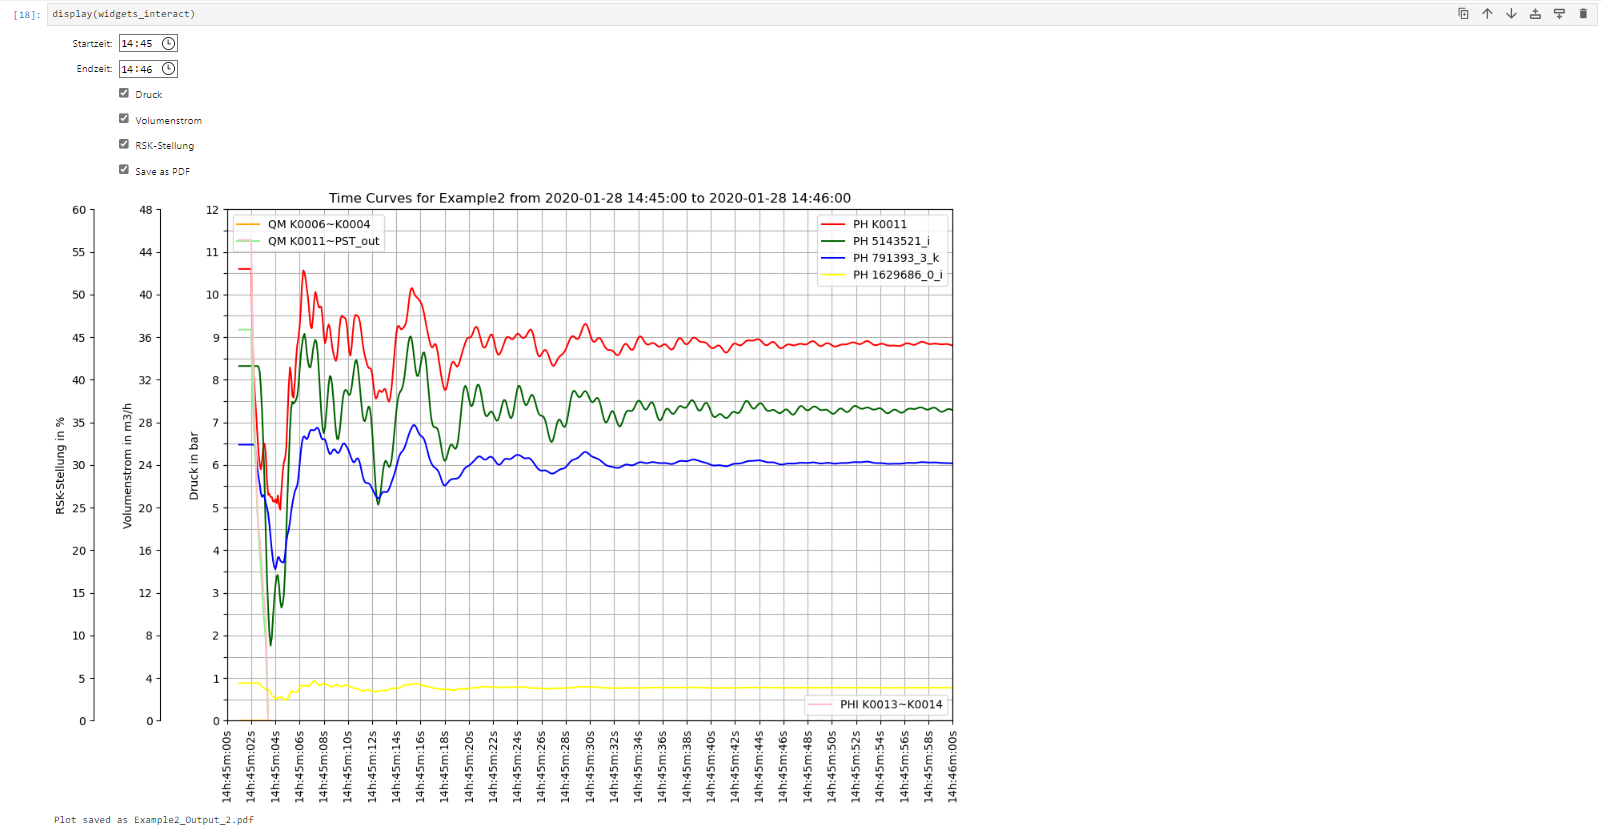

In [23]:
try:
    image = Image(filename=os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))+r"\Examples\Images\1_example2_interactive_widget_plot.png")
    display(image)
except:
    print('png not displayed')
#NBVAL_IGNORE_OUTPUT

### Using Bokeh

In [20]:
def plot_data(plot_druck=True, plot_volumenstrom=True, plot_rsk_stellung=True):
    
    source = ColumnDataSource(df)

    # List of columns to plot
    cols_to_plot = ['KNOT~K0011~~PH', 'KNOT~5143521_i~~PH', 'KNOT~791393_3_k~~PH', 'KNOT~1629686_0_i~~PH'] if plot_druck else []
    cols_to_plot_2 = ['VENT~K0006~K0004~QM', 'VENT~K0011~PST_out~QM'] if plot_volumenstrom else []
    cols_to_plot_3 = ['KLAP~K0013~K0014~PHI'] if plot_rsk_stellung else []

    # Define the plot size
    p = figure(width=1366, height=768, x_axis_type="datetime", y_range=(0, 12), title='Time Curves for '+dbFilename)

    # Adding a line for each column to the plot
    for i, col in enumerate(cols_to_plot):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i], alpha=0.8, legend_label=col)

    # Add a label to the y axis
    p.yaxis.axis_label = 'Druck in bar' if plot_druck else ''

    # Create a new y range for the second set of columns
    p.extra_y_ranges = {"Volumenstrom in m^3/h": Range1d(start=0, end=40) if plot_volumenstrom else Range1d(start=0, end=1),  # Adjust the range according to your data
                        "RSK-Stellung in %": Range1d(start=0, end=60) if plot_rsk_stellung else Range1d(start=0, end=1)}  # Adjust the range according to your data

    # Adding a line for each column in the second set to the plot with the new y range
    for i, col in enumerate(cols_to_plot_2):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i + len(cols_to_plot)], alpha=0.8, legend_label=col, y_range_name="Volumenstrom in m^3/h")

    # Adding a line for each column in the third set to the plot with the new y range
    for i, col in enumerate(cols_to_plot_3):
        # Use a different color for each line from the Spectral10 palette
        p.line(df.index, df[col], line_width=2, color=Spectral10[i + len(cols_to_plot) + len(cols_to_plot_2)], alpha=0.8, legend_label=col, y_range_name="RSK-Stellung in %")

    # Add a second y axis to the left that corresponds to the new y range
    if plot_volumenstrom:
        p.add_layout(LinearAxis(y_range_name="Volumenstrom in m^3/h", axis_label='Volumenstrom in m^3/h'), 'left')
    if plot_rsk_stellung:
        p.add_layout(LinearAxis(y_range_name="RSK-Stellung in %", axis_label='RSK-Stellung in %'), 'left')

    output_notebook()

    # Show the plot
    show(p)

In [21]:
plot_data(plot_druck=True
          ,plot_volumenstrom=True
          ,plot_rsk_stellung=True)

Loading BokehJS ...